# BIFROST Article plots

In [1]:
from KGS import *

In [2]:
data = np.loadtxt('Multiple_pulses_test_2/ToF_BeforeSampel.dat').T

t = data[0]/1000
tt = t[(t>108) & (t<240)]

I = data[1]
I = I[(t>108) & (t<240)]

I_err = data[2]
I_err = I_err[(t>108) & (t<240)]

closed = np.where(I==0)
print(closed)

# Defining flat pieces in y:

yranges = np.linspace(0, np.max(I)+1e5,1000)

x1 = np.zeros(1000)+tt[0]
x2 = np.zeros(1000)+tt[4]

x3 = np.zeros(1000)+tt[204]
x4 = np.zeros(1000)+tt[208]

#x5 = np.zeros(1000)+tt[408]
#x6 = np.zeros(1000)+tt[412]



(array([  0,   1,   2,   3,   4, 204, 205, 206, 207, 208]),)


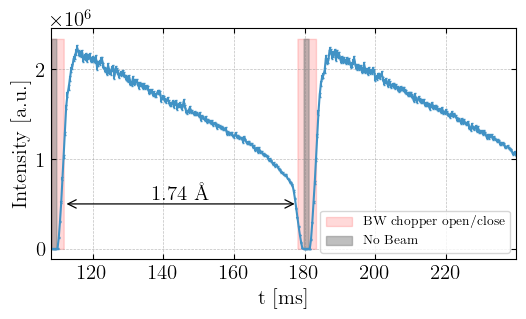

In [3]:
fig, ax = plt.subplots(figsize=(6,3))

ax.errorbar(tt, I, I_err, color='#4192C5', capsize=1)
ax.set_xlabel('t [ms]')
ax.set_ylabel('Intensity [a.u.]')
ax.grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.set_xlim(np.min(tt), np.max(tt))
#ax.fill_betweenx(yranges, x5, x6, alpha=0.3, color='grey')

## Finding half way points
k=20
#ax.plot(tt[k], I[k], '.r')

interp_func = interp1d(tt, I, kind='linear', fill_value="extrapolate")
I_r1 = I[tt<125]
differences_k = np.abs(I_r1 - I[k]/2)
min_index_k = np.argmin(differences_k)
tt_I_half_k = tt[min_index_k]



l=192
#ax.plot(tt[l], I[l], '.r')

I_r2 = I[tt<180]
differences_l = np.abs(I_r2 - I[l]/2)
min_index_l = np.argmin(differences_l)
tt_I_half_l = tt[min_index_l]


h=225
#ax.plot(tt[h], I[h], '.r')

I_r3 = I[(tt>180) & (tt<200)]
differences_h = np.abs(I_r3 - I[h]/2)
min_index_h = np.argmin(differences_h)
tt_r3 = tt[(tt>180) & (tt<200)]
tt_I_half_h = tt_r3[min_index_h]



#ax.plot(tt_I_half_k, I[k]/2, '.m')
#ax.plot(tt_I_half_l, I[l]/2, '.m')
#ax.plot(tt_I_half_h, I[h]/2, '.m')

## Defingning fillbetweenx()

xr_1 =  np.zeros(1000)+tt[0]
xr_2 = np.zeros(1000)+tt_I_half_k

xr_3 =  np.zeros(1000)+tt_I_half_l
xr_4 = np.zeros(1000)+tt_I_half_h

ax.fill_betweenx(yranges, xr_1, xr_2, alpha=0.15, color='red', label='BW chopper open/close')
ax.fill_betweenx(yranges, xr_3, xr_4, alpha=0.15, color='red')

ax.fill_betweenx(yranges, x1, x2, alpha=0.5, color='grey', label='No Beam')
ax.fill_betweenx(yranges, x3, x4, alpha=0.5, color='grey')

ax.annotate(
    text='',
    xy=(tt_I_half_k, 0.5e6),    # starting point of the arrow
    xytext=(tt_I_half_l, 0.5e6),  # ending point of the arrow
    arrowprops=dict(arrowstyle='<->', color='black', linewidth=0.9),
)

# Add labels to the arrow
ax.text(145, 0.6e6, '1.74 Å', color='black', ha='center', va='center', fontsize=15)

ax.legend(fontsize=9.5)
plt.savefig('time_pulses.png', format='png', bbox_inches='tight',dpi=500)


In [4]:
def calc_wavelength(t):
    return t*1e3/(252.78*162)

print(calc_wavelength(tt_I_half_k))

print(calc_wavelength(tt_I_half_h))

print('diff Å =', calc_wavelength(tt_I_half_h) - calc_wavelength(tt_I_half_k))

2.730745224217809
4.474319639680823
diff Å = 1.7435744154630144


# DiwJaws settings effect on divergence

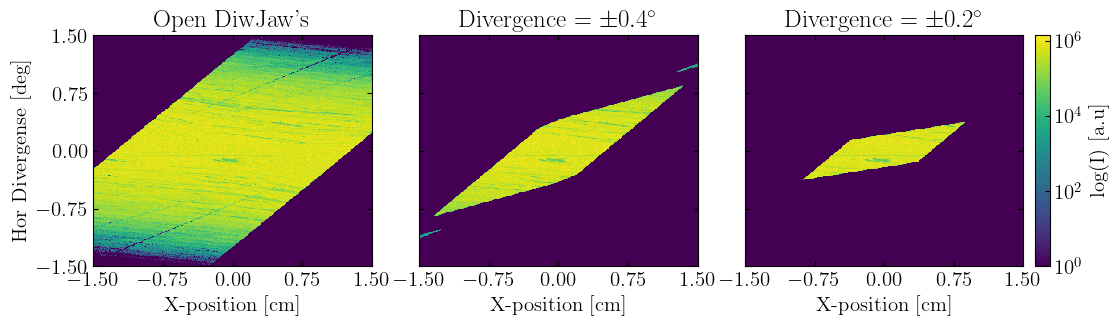

In [38]:
from matplotlib.colors import LogNorm

data_open = np.loadtxt('diwJaw_test_Open_3/DivX_monitor.dat').reshape(3,300,300)
data_0p4 = np.loadtxt('diwJaw_test_0p4deg_3/DivX_monitor.dat').reshape(3,300,300)
data_0p2 = np.loadtxt('diwJaw_test_0p2deg_3/DivX_monitor.dat').reshape(3,300,300)

data_open[data_open == 0] = 1e-10
data_0p4[data_0p4 == 0] = 1e-10
data_0p2[data_0p2 == 0] = 1e-10

x_values = np.linspace(-1.5, 1.5, 301)
y_values = np.linspace(-1.5, 1.5, 301)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)


fig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.17)
pcm1 = ax[0].pcolormesh(x_mesh, y_mesh, data_open[0], cmap='viridis', norm=LogNorm(vmin=1, vmax=np.max(data_open[0])))
pcm2 = ax[1].pcolormesh(x_mesh, y_mesh, data_0p4[0], cmap='viridis', norm=LogNorm(vmin=1, vmax=np.max(data_open[0])))
pcm3 = ax[2].pcolormesh(x_mesh, y_mesh, data_0p2[0], cmap='viridis', norm=LogNorm(vmin=1, vmax=np.max(data_open[0])))

cbar_ax = fig.add_axes([0.91, 0.11, 0.012, 0.77])
cbar = plt.colorbar(pcm1, cax=cbar_ax,ax=ax, orientation='vertical') # norm=colors.LogNorm(vmin=np.min(data_open[0]), vmax=np.max(data_open[0]))
cbar.set_label('log(I) [a.u]')

ax[0].set_xlabel('X-position [cm]')
ax[0].set_title('Open DiwJaw\'s')
ax[0].set_ylabel('Hor Divergense [deg]')
ax[0].set_yticks([-1.5, -0.75, 0, 0.75, 1.5])
ax[0].set_xticks([-1.5, -0.75,0, 0.75, 1.5])

ax[1].set_xlabel('X-position [cm]')
ax[1].set_title('Divergence $= \pm 0.4 ^{\circ}$')

ax[2].set_xlabel('X-position [cm]')
ax[2].set_title('Divergence $= \pm 0.2 ^{\circ}$')
#plt.tight_layout()

plt.savefig('diw_jaws_divergence_wide.png', format='png', bbox_inches='tight', dpi=500)

# Beam at sample position

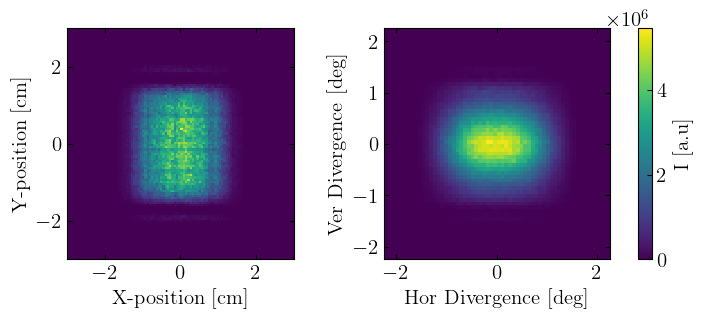

In [39]:
data_div_sample = np.loadtxt('diwJaw_test_Open_3/PSD_sample_large.dat').reshape(3,60,60)
data_psd_sample = np.loadtxt('diwJaw_test_Open_3/Div2d_sample.dat').reshape(3,100,100)

data_div_sample[data_div_sample == 0] = 1e-10
data_psd_sample[data_psd_sample == 0] = 1e-10

x_val_div= np.linspace(-2.25, 2.25, 61)
y_val_div = np.linspace(-2.25, 2.25, 61)
x_mesh_div, y_mesh_div = np.meshgrid(x_val_div, y_val_div)

x_val_psd= np.linspace(-3, 3, 101)
y_val_psd = np.linspace(-3, 3, 101)
x_mesh_psd, y_mesh_psd = np.meshgrid(x_val_psd, y_val_psd)

fig, ax = plt.subplots(1,2, figsize=(7,3))
fig.subplots_adjust(wspace=0.4)
pcm1 = ax[0].pcolormesh(x_mesh_psd, y_mesh_psd, data_psd_sample[0], cmap='viridis')
pcm2 = ax[1].pcolormesh(x_mesh_div, y_mesh_div, data_div_sample[0], cmap='viridis')

ax[0].set_xlabel('X-position [cm]')
ax[0].set_ylabel('Y-position [cm]')

ax[1].set_xlabel('Hor Divergence [deg]')
ax[1].set_ylabel('Ver Divergence [deg]')

cbar_ax = fig.add_axes([0.94, 0.11, 0.02, 0.77])
cbar = plt.colorbar(pcm1, cax=cbar_ax,ax=ax, orientation='vertical') # norm=colors.LogNorm(vmin=np.min(data_open[0]), vmax=np.max(data_open[0]))
cbar.set_label('I [a.u]')

plt.savefig('Beam_profile_sample.png', format='png', bbox_inches='tight', dpi=500)